# Clustering 

##### Denetimsiz- Unsupervised Learning -Hedef "y" yok

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("cars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.metrics import silhouette_score
#elbow method - dirsek methodu

In [7]:
x=df[["Price","Mileage","Cylinder"]]
#özelliklerine göre grupluyoruz.

In [8]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [9]:
model=KMeans(n_clusters=4) #4 grup ayırmayı uygun gördük

In [12]:
model=model.fit(x) #verinin kime ne kadar benzediğini öğrendi

In [13]:
tahmin=model.predict(x)

In [14]:
tahmin

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [15]:
x["cluster"]=tahmin #yeni kolon ekleyip gruplamayı ekliyoruz

<ipython-input-15-6c3d52b38dde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"]=tahmin


In [16]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,1
1,17542.036083,9135,6,1
2,16218.847862,13196,6,1
3,16336.913140,16342,6,1
4,16339.170324,19832,6,2


In [23]:
silhouette_score(x,tahmin) #burda yüksek çıkmasını beklemiyoruz. eğer bunun sonucu değişmiyorssa artık orda durmak lazım başka bir grup eklemeye gerek yok (bir yere ne kadar market açsam en çok karı elde ederim. ne kadar olmallı onu bu şekilde anlııyoruz)

0.4116887844331703

In [20]:
import matplotlib.pyplot as plt

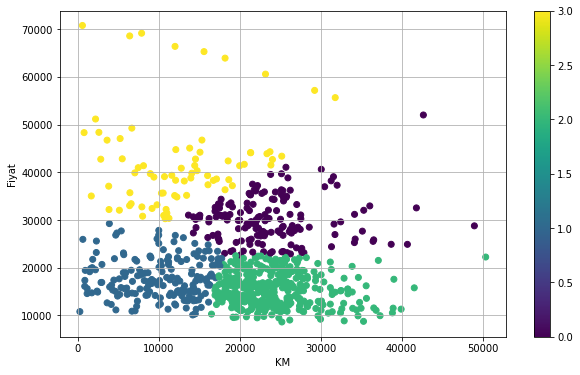

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin)
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.colorbar()
plt.grid()
#

In [33]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("cluster ",i," score",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
        
clust(11)

cluster  2  score 0.45170118946922694
cluster  3  score 0.41321086325651796
cluster  4  score 0.41455890159386605
cluster  5  score 0.35465903036708357
cluster  6  score 0.3629837831215598
cluster  7  score 0.3558445030215276
cluster  8  score 0.36810474497564105
cluster  9  score 0.34766639093411705
cluster  10  score 0.3569416793514598
cluster  11  score 0.3588541125518518


In [29]:
#artık veriler tekrar ettiğinde durmamız lazım. bu örnekte cluster 5'te yani i=4'te durmalıyız.

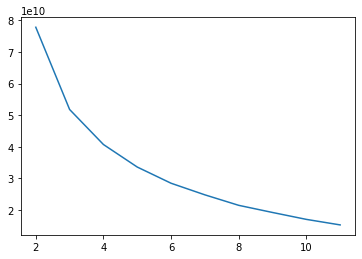

In [34]:
plt.plot(allclusters,uzakliklar)

In [35]:
#elbow metodu -> grafikte ne zamanki çizgi x'e daha yakın o zaman durmalı. 4'te kırılım var bu örnek için 4. dirsekte ordan geliyor olmalı

#elbow metodunun gösterdiği üzre veriyi 4 farklı kümede toplamanın en ideal olduğunu düşünüyoruz.
#(buna göre kaç kümeye ayıracağımıza kara veriyoruz )
# Ucuz ve üzerine az km olan, ucuz üzerine cok km, pahali ama az km, orta
#(raporu bu şekilde sunabiliriz)

In [38]:
df[df["Price"]>60000] #cadillac'lar hep pahalıdır

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
155,63913.117248,18200,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
156,60567.549093,23193,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
